This file contains linear machine learning models utilizing the sci-kit learn module

This includes:

    multiple linear regression
    lasso regression
    ridge regression
    elastic net regression
    principal component regression
    
Our target metric is *Root Mean Squared Error* (RMSE). I will also include *Mean Absolute Percentage Error* (MAPE) which can be a little easier to interpret

In [112]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt

In [24]:
# Set pandas display precision to 4 decimal places
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(precision=4)

## Importing Data Set

In [2]:
# Importing processed dataframe
path_project = "C:/Users/Conno/Documents/Career/Projects/Hospital_Charges"

os.chdir(path_project)

df = pd.read_csv("./df_processed.csv")

In [13]:
df["charges"].describe()

count    4.834000e+03
mean     5.571889e+04
std      9.537884e+04
min      1.212000e+03
25%      9.630500e+03
50%      2.394900e+04
75%      6.086837e+04
max      1.273347e+06
Name: charges, dtype: float64

## Train-Test Split

80-20 split

In [3]:
X = df.drop(columns = ["charges"])
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

# Multiple Linear Regression

In [62]:
# Fitting the multiple linear regression model
multiple_lm = LinearRegression()
multiple_lm.fit(X_train, y_train)

# predicting using the model

multiple_lm_predictions = multiple_lm.predict(X_test)

# Calculating MAPE of test set
multiple_lm_mape = mean_absolute_percentage_error(y_test, multiple_lm_predictions)
print("Multiple Linear Regression MAPE:", multiple_lm_mape)

# Calculating RMSE of test set

multiple_lm_rmse = np.sqrt(mean_squared_error(y_test, multiple_lm_predictions))
print("Multiple Linear Regression RMSE:", multiple_lm_rmse)

Multiple Linear Regression MAPE: 1.1277733777501542
Multiple Linear Regression RMSE: 63525.15762253807


## Coefficients

In [67]:
predictor_names = X.columns
mult_lm_coeffs = multiple_lm.coef_

predictor_coefs = {predictor: coef for predictor, coef in zip(predictor_names, mult_lm_coeffs)}
sorted_predictor_coefs = dict(sorted(predictor_coefs.items(), key=lambda item: item[1]))

for predictor, coef in sorted_predictor_coefs.items():
    print(f"{predictor}: {coef:.4f}")

surv6m: -74806.2860
race_black: -36068.7755
race_white: -31993.1443
dzgroup_mosf_w_malig: -20650.0110
dzclass_coma: -19323.0453
dzgroup_coma: -19323.0453
diabetes: -13052.5518
sfdm2_sip>=30: -10900.5517
dzgroup_cirrhosis: -10255.2299
dnr_no_dnr: -9457.3729
death: -9073.1667
dementia: -8427.6690
dzgroup_lung_cancer: -7563.2557
dzclass_cancer: -6446.8199
sfdm2_no_m2_and_sip_pres_: -5139.5044
dzclass_copd_chf_cirrhosis: -5065.4219
sfdm2_adl>=4_>=5_if_sur_: -4099.9767
sex_male: -1971.2279
hospdead: -1948.2531
dzgroup_copd: -1685.1442
sps: -1319.3237
adlsc: -1083.3734
age: -589.6487
ca_yes: -283.8339
wblc: -217.5467
meanbp: -98.1873
d_time: -7.0570
hrt: 4.4819
resp: 146.4190
scoma: 227.2443
sod: 255.4888
aps: 375.6621
prg2m: 545.8644
dnrday: 1009.4615
dzgroup_colon_cancer: 1116.4359
avtisst: 1153.2949
crea: 1317.6018
slos: 1374.4861
temp: 1635.3863
edu: 2005.6947
dnr_dnr_before_sadm: 2502.4048
race_hispanic: 3050.5558
hday: 3511.4302
ca_no: 6472.8535
dzgroup_chf: 6874.9522
num_co_1: 11026.1

We can see here, by the coefficient values, the signifiance given to each predictor as determined by multiple linear regression.

**MORE INFERNCE LATER**

# Lasso Regression

In [29]:
# Fitting lasso regression. 10 Fold cross validation is automatically performed to select best alpha (hyperparameter) value
lasso_cv = LassoCV(cv = 10, random_state = 32)
lasso_cv.fit(X_train, y_train)

alphas = lasso_cv.alphas_
mse_path = lasso_cv.mse_path_
mean_mse = mse_path.mean(axis = 1)

In [35]:
lasso_cv.alpha_

2288.6289222556575

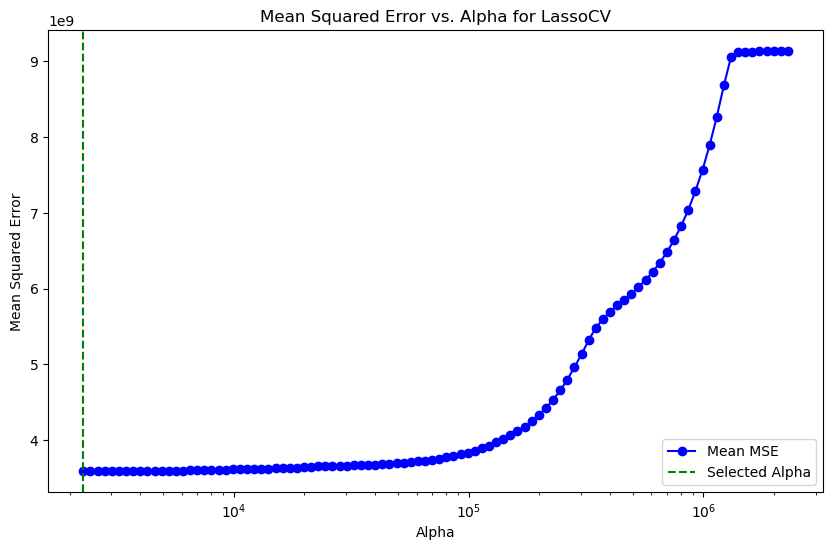

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_mse, marker='o', linestyle='-', color='b', label='Mean MSE')
plt.axvline(lasso_cv.alpha_, color='g', linestyle='--', label='Selected Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha for LassoCV')
plt.legend()
plt.xscale('log')
plt.show()


## Coefficients

In [68]:
predictor_names = X.columns
lasso_coeffs = lasso_cv.coef_

predictor_coefs = {predictor: coef for predictor, coef in zip(predictor_names, lasso_coeffs)}
sorted_predictor_coefs = dict(sorted(predictor_coefs.items(), key = lambda item: item[1]))

for predictor, coef in sorted_predictor_coefs.items():
    print(f"{predictor}: {coef:.4f}")

sps: -437.3132
age: -419.3492
adlsc: -275.3113
wblc: -219.5193
meanbp: -127.2932
d_time: -4.8914
death: -0.0000
hospdead: 0.0000
surv2m: 0.0000
surv6m: -0.0000
diabetes: -0.0000
dementia: -0.0000
prg2m: 0.0000
prg6m: 0.0000
temp: 0.0000
sex_male: -0.0000
dzgroup_chf: 0.0000
dzgroup_copd: 0.0000
dzgroup_cirrhosis: -0.0000
dzgroup_colon_cancer: 0.0000
dzgroup_coma: -0.0000
dzgroup_lung_cancer: 0.0000
dzgroup_mosf_w_malig: -0.0000
dzclass_copd_chf_cirrhosis: 0.0000
dzclass_cancer: 0.0000
dzclass_coma: -0.0000
num_co_1: -0.0000
num_co_2: 0.0000
num_co_3: 0.0000
num_co_4: 0.0000
num_co_5: -0.0000
num_co_6: 0.0000
race_black: -0.0000
race_hispanic: 0.0000
race_white: -0.0000
ca_no: 0.0000
ca_yes: -0.0000
dnr_dnr_before_sadm: 0.0000
dnr_no_dnr: -0.0000
sfdm2_sip>=30: -0.0000
sfdm2_adl>=4_>=5_if_sur_: -0.0000
sfdm2_no_m2_and_sip_pres_: 0.0000
hrt: 38.8067
scoma: 140.8075
resp: 154.7992
sod: 210.1233
crea: 352.8398
aps: 379.5750
dnrday: 876.6400
avtisst: 1088.4186
slos: 1479.3220
edu: 1770.5374

We can see here, by the coefficient values, the signifiance given to each predictor as determined by lasso regularization. This is a stark contrast to the coefficents from multiple linear regression. 

Coefficients with a value of 0 were deduced to be insignificant to the model and thus removed.

## Evaluating Performance

In [39]:
lasso_predictions = lasso_cv.predict(X_test)

# Calculating MAPE of test set
lasso_mape = mean_absolute_percentage_error(y_test, lasso_predictions)
print("Lasso Regression MAPE:", lasso_mape)

# Calculating RMSE of test set
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
print("Lasso Regression RMSE:", lasso_rmse)


Lasso Regression MAPE: 0.9670414822564715
Lasso Regression RMSE: 64610.73290397097


Better MAPE but worse RMSE

# Ridge Regression

In [56]:
# Fitting ridge regression. 10 Fold cross validation is automatically performed to select best alpha (hyperparameter) value
ridge_cv = RidgeCV(cv = 10) # no random state
ridge_cv.fit(X_train, y_train)

ridge_cv.alpha_ # best alpha value chosen

10.0

## Coefficients

In [73]:
predictor_names = X.columns
ridge_coeffs = ridge_cv.coef_

predictor_coefs = {predictor: coef for predictor, coef in zip(predictor_names, lasso_coeffs)}
sorted_predictor_coefs = dict(sorted(predictor_coefs.items(), key = lambda item: item[1]))

for predictor, coef in sorted_predictor_coefs.items():
    print(f"{predictor}: {coef:.4f}")

sps: -437.3132
age: -419.3492
adlsc: -275.3113
wblc: -219.5193
meanbp: -127.2932
d_time: -4.8914
death: -0.0000
hospdead: 0.0000
surv2m: 0.0000
surv6m: -0.0000
diabetes: -0.0000
dementia: -0.0000
prg2m: 0.0000
prg6m: 0.0000
temp: 0.0000
sex_male: -0.0000
dzgroup_chf: 0.0000
dzgroup_copd: 0.0000
dzgroup_cirrhosis: -0.0000
dzgroup_colon_cancer: 0.0000
dzgroup_coma: -0.0000
dzgroup_lung_cancer: 0.0000
dzgroup_mosf_w_malig: -0.0000
dzclass_copd_chf_cirrhosis: 0.0000
dzclass_cancer: 0.0000
dzclass_coma: -0.0000
num_co_1: -0.0000
num_co_2: 0.0000
num_co_3: 0.0000
num_co_4: 0.0000
num_co_5: -0.0000
num_co_6: 0.0000
race_black: -0.0000
race_hispanic: 0.0000
race_white: -0.0000
ca_no: 0.0000
ca_yes: -0.0000
dnr_dnr_before_sadm: 0.0000
dnr_no_dnr: -0.0000
sfdm2_sip>=30: -0.0000
sfdm2_adl>=4_>=5_if_sur_: -0.0000
sfdm2_no_m2_and_sip_pres_: 0.0000
hrt: 38.8067
scoma: 140.8075
resp: 154.7992
sod: 210.1233
crea: 352.8398
aps: 379.5750
dnrday: 876.6400
avtisst: 1088.4186
slos: 1479.3220
edu: 1770.5374

## Evaluating Performance

In [74]:
ridge_predictions = ridge_cv.predict(X_test)

# Calculating MAPE of test set
ridge_mape = mean_absolute_percentage_error(y_test, ridge_predictions)
print("Ridge Regression MAPE:", ridge_mape)

# Calculating RMSE of test set
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print("Ridge Regression RMSE:", ridge_rmse)


Ridge Regression MAPE: 1.0896961815202495
Ridge Regression RMSE: 63487.340270539506


# Elastic Net

In [92]:
# Fitting Elastic Net regression. 10 Fold cross validation is automatically performed to select best alpha (hyperparameter) value 
# and l1_ratio
l1_ratio = np.linspace(0.1, 1, 100)

enet_cv = ElasticNetCV(l1_ratio = l1_ratio, cv = 10, random_state = 32)
enet_cv.fit(X_train, y_train)

mse_path = enet_cv.mse_path_
mean_mse_path = mse_path.mean(axis = 1)


In [95]:
l1_ratio

array([0.1   , 0.1091, 0.1182, 0.1273, 0.1364, 0.1455, 0.1545, 0.1636,
       0.1727, 0.1818, 0.1909, 0.2   , 0.2091, 0.2182, 0.2273, 0.2364,
       0.2455, 0.2545, 0.2636, 0.2727, 0.2818, 0.2909, 0.3   , 0.3091,
       0.3182, 0.3273, 0.3364, 0.3455, 0.3545, 0.3636, 0.3727, 0.3818,
       0.3909, 0.4   , 0.4091, 0.4182, 0.4273, 0.4364, 0.4455, 0.4545,
       0.4636, 0.4727, 0.4818, 0.4909, 0.5   , 0.5091, 0.5182, 0.5273,
       0.5364, 0.5455, 0.5545, 0.5636, 0.5727, 0.5818, 0.5909, 0.6   ,
       0.6091, 0.6182, 0.6273, 0.6364, 0.6455, 0.6545, 0.6636, 0.6727,
       0.6818, 0.6909, 0.7   , 0.7091, 0.7182, 0.7273, 0.7364, 0.7455,
       0.7545, 0.7636, 0.7727, 0.7818, 0.7909, 0.8   , 0.8091, 0.8182,
       0.8273, 0.8364, 0.8455, 0.8545, 0.8636, 0.8727, 0.8818, 0.8909,
       0.9   , 0.9091, 0.9182, 0.9273, 0.9364, 0.9455, 0.9545, 0.9636,
       0.9727, 0.9818, 0.9909, 1.    ])

In [94]:
enet_cv.l1_ratio_ # l1_ratio chosen by the fit

1.0

Here `l1_ratio = 1.0` corresponds to pure Lasso reression (L1 Regularization) and `l1_ratio = 0` would be the pure Ridge regression (L2 Regularization). Since `ElasticNetCV` selected `1.0`, it means the model has chosen to use pure lasso regression for the optimal performance which we have already performed

# Principal Components Regression

Principal Component regression entails dimension reduction through the principal components (linear combinations of the predictors) and fitting linear regression.

We will need to standardize the predictors because of the highly varying scales

In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

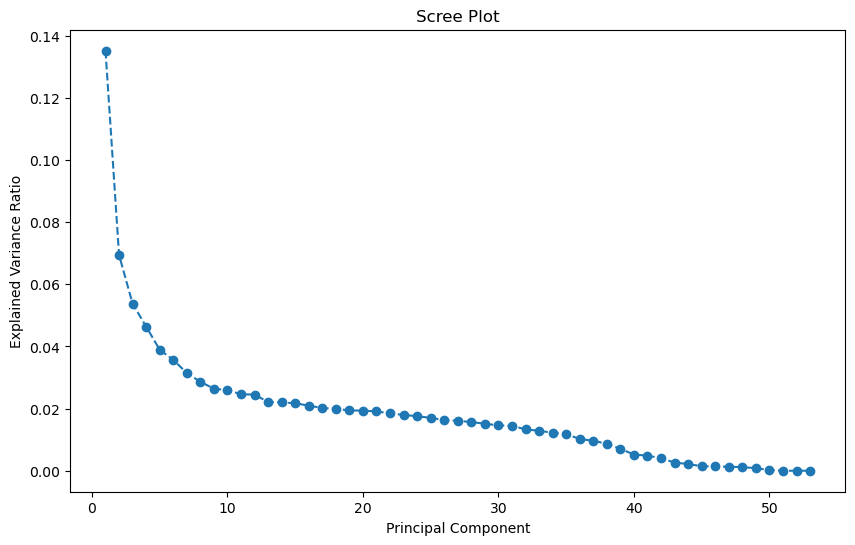

In [114]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize = (10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


The explained variance seems to flatten out after the 38th principal component

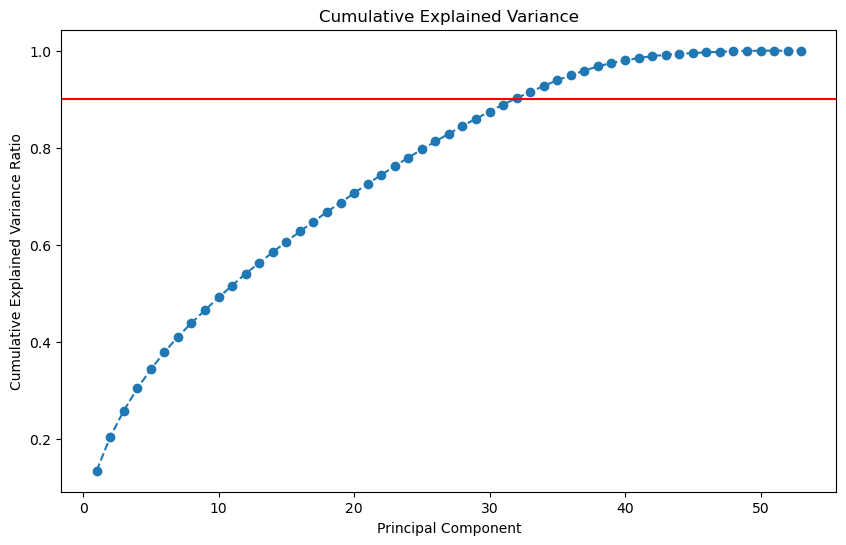

In [128]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

The red line represent the cumulative variance of 0.9 which will determine the amount of PC's we use

In [130]:
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
n_components

32

## Fitting PCA

In [132]:
X_train_pca_selected = X_train_pca[:, :n_components]
X_test_pca_selected = X_test_pca[:, :n_components]

regressor = LinearRegression()
regressor.fit(X_train_pca_selected, y_train)

pcr_predictions = regressor.predict(X_test_pca_selected)

# Calculating MAPE of test set
pcr_mape = mean_absolute_percentage_error(y_test, pcr_predictions)
print("PCR Regression MAPE:", pcr_mape)

# Calculating RMSE of test set
pcr_rmse = np.sqrt(mean_squared_error(y_test, pcr_predictions))
print("PCR Regression RMSE:", pcr_rmse)

PCR Regression MAPE: 1.0551790357764699
PCR Regression RMSE: 64376.96862938301
